# Violence & Imapct Early-Warning System (VIEWS)

Predicting conflict and humanitarian impacts | VIEWS

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("VIEWS.csv").convert_dtypes()

### Rows and columns in the dataset

In [5]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 31


In [6]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

### Sample data and features

In [7]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,BLZ,TUV,ZMB,TUN,ZWE
region_code,LAC,EAP,SSA,MNA,SSA
pop,411106.0,9816.0,20723965.0,12200431.0,16340822.0
VIEWS_main_dich,0.004,0.004,0.0044,0.0052,0.0043
VIEWS_main_mean,0.0187,0.0074,0.072,0.1949,0.0558
VIEWS_main_mean_ln,0.0186,0.0073,0.0695,0.1781,0.0543
VIEWS_PRED_ucdp_ged_ns_best_sum,<NA>,<NA>,<NA>,<NA>,<NA>
VIEWS_PRED_ucdp_ged_os_best_sum,<NA>,<NA>,<NA>,<NA>,<NA>
VIEWS_PRED_ucdp_ged_sb_best_sum,<NA>,<NA>,<NA>,<NA>,<NA>
VIEWS_PRED_vdem_v2x_civlib,<NA>,<NA>,<NA>,<NA>,<NA>


### Data structure, data types, and non-null counts

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   iso3                              58725 non-null  string 
 1   region_code                       58725 non-null  string 
 2   pop                               58713 non-null  Float64
 3   VIEWS_main_dich                   804 non-null    Float64
 4   VIEWS_main_mean                   804 non-null    Float64
 5   VIEWS_main_mean_ln                804 non-null    Float64
 6   VIEWS_PRED_ucdp_ged_ns_best_sum   53924 non-null  Float64
 7   VIEWS_PRED_ucdp_ged_os_best_sum   53924 non-null  Int64  
 8   VIEWS_PRED_ucdp_ged_sb_best_sum   53924 non-null  Float64
 9   VIEWS_PRED_vdem_v2x_civlib        48197 non-null  Float64
 10  VIEWS_PRED_vdem_v2x_gender        48177 non-null  Float64
 11  VIEWS_PRED_vdem_v2x_libdem        48197 non-null  Float64


### Descriptive statistics of categorical columns

In [9]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


### Descriptive statistics of numerical columns

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
VIEWS_main_dich,804.0,0.137653,0.302349,0.0026,0.0036,0.004,0.019975,1.0
VIEWS_main_mean,804.0,74.102058,765.739768,0.0011,0.0102,0.0454,1.868675,17338.1558
VIEWS_main_mean_ln,804.0,0.999527,1.817084,0.0011,0.0101,0.0444,1.053825,9.7607
VIEWS_PRED_ucdp_ged_ns_best_sum,53924.0,7.039157,107.60891,0.0,0.0,0.0,0.0,11133.0
VIEWS_PRED_ucdp_ged_os_best_sum,53924.0,21.594967,2743.687674,0.0,0.0,0.0,0.0,629870.0
VIEWS_PRED_ucdp_ged_sb_best_sum,53924.0,40.057433,853.95789,0.0,0.0,0.0,0.0,124427.0
VIEWS_PRED_vdem_v2x_civlib,48197.0,0.595735,0.246365,0.015,0.406,0.649,0.811,0.962
VIEWS_PRED_vdem_v2x_gender,48177.0,0.629002,0.181708,0.026,0.508,0.663,0.772,0.951
VIEWS_PRED_vdem_v2x_libdem,48197.0,0.283367,0.19506,0.005,0.114,0.243,0.422,0.859


### Deatils of missing values in the features

In [11]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
VIEWS_main_mean,57921,98.63
VIEWS_main_dich,57921,98.63
VIEWS_main_mean_ln,57921,98.63
VIEWS_surrogate_mean_nch_ln,57921,98.63
VIEWS_surrogate_mean_pop_ln,57921,98.63
VIEWS_surrogate_mean_pop,57921,98.63
VIEWS_surrogate_mean_dem,57921,98.63
VIEWS_surrogate_mean_dem_ln,57921,98.63
VIEWS_surrogate_mean_imr,57921,98.63
VIEWS_surrogate_mean_imr_ln,57921,98.63


In [12]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [13]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

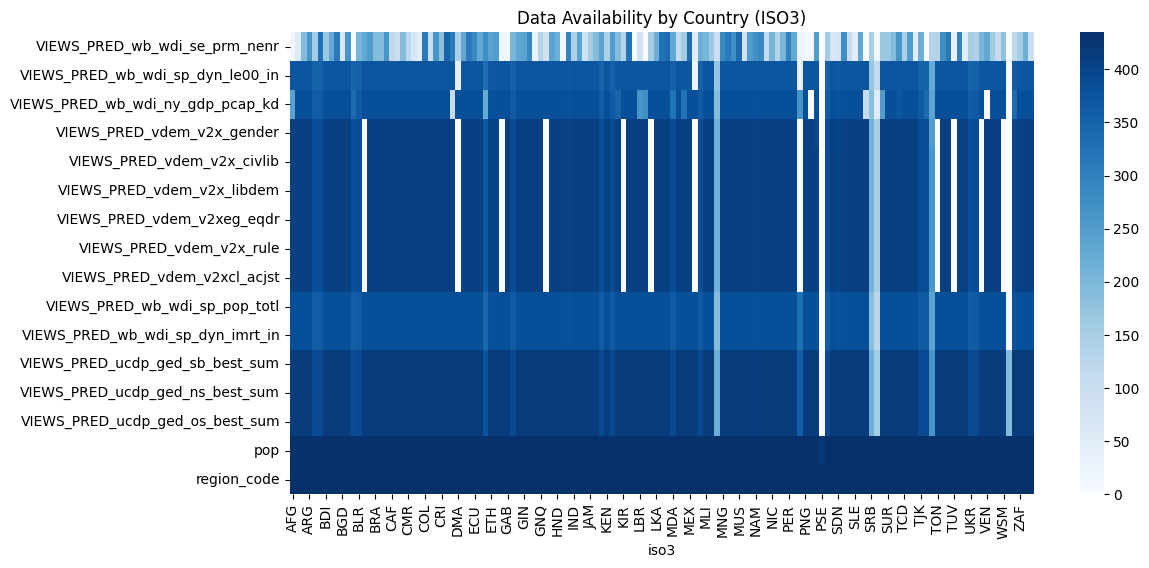

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

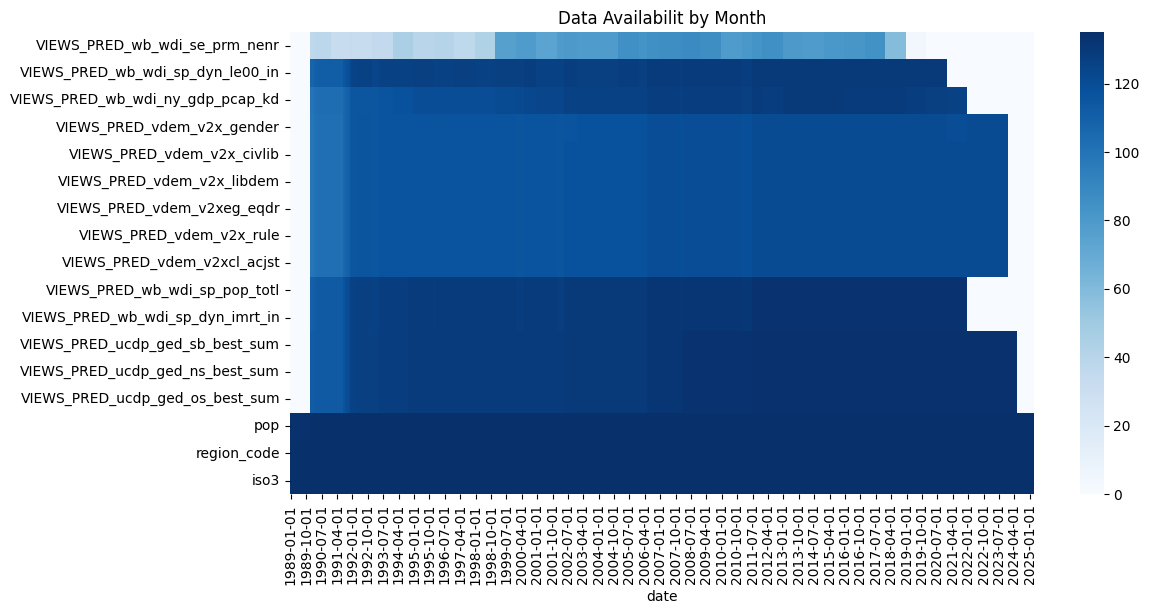

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [27]:
numeric_df.shape

(21486, 15)

In [16]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

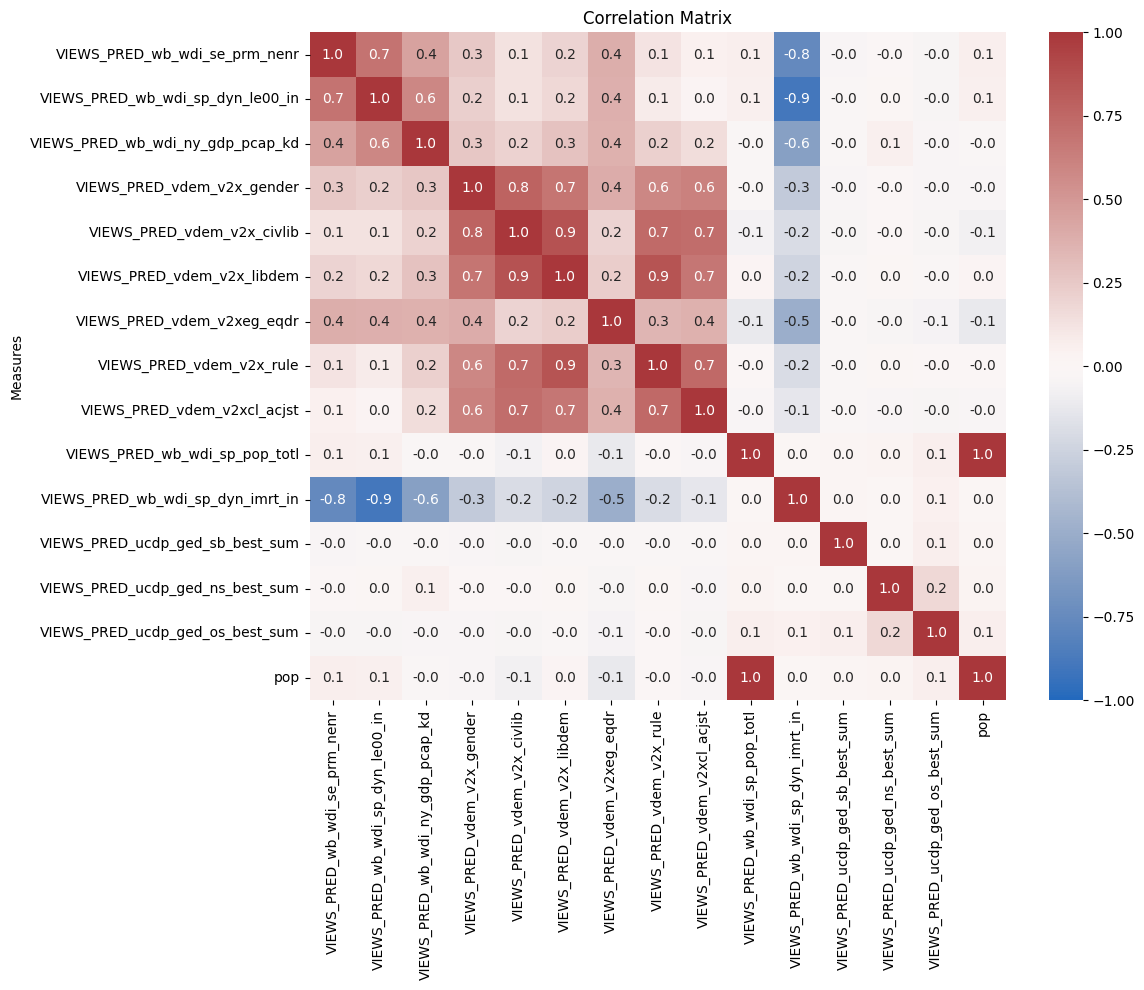

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Principal Components Analysis of the features

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 5
Column names for PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']


In [19]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [20]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

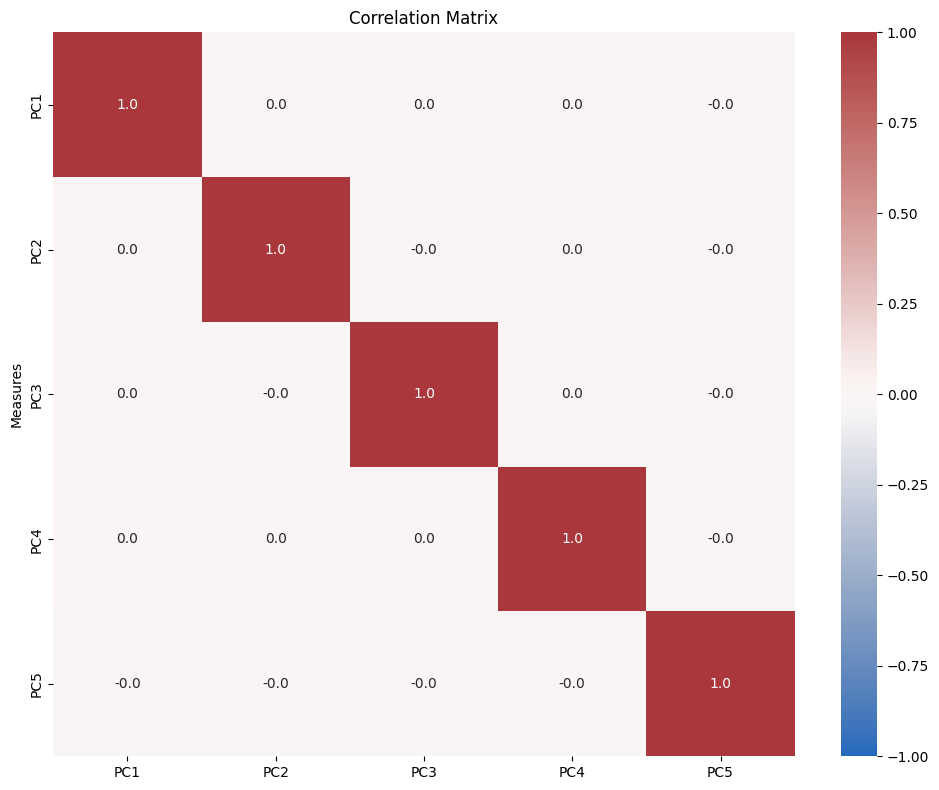

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

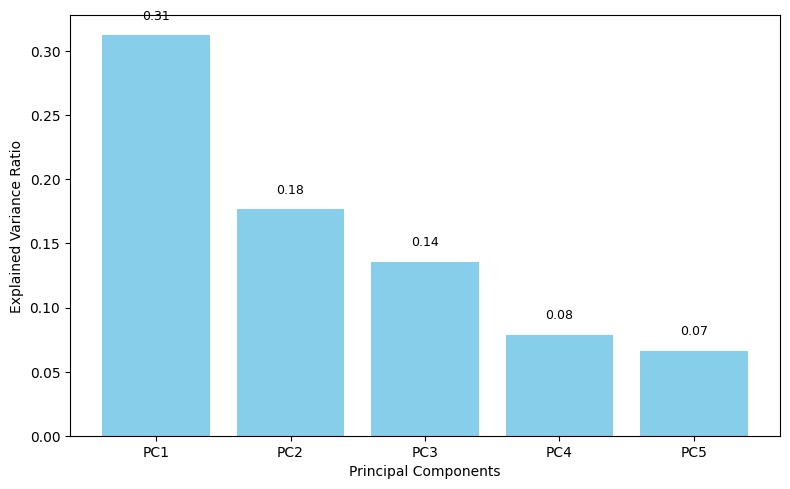

In [22]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 2: 0.4891


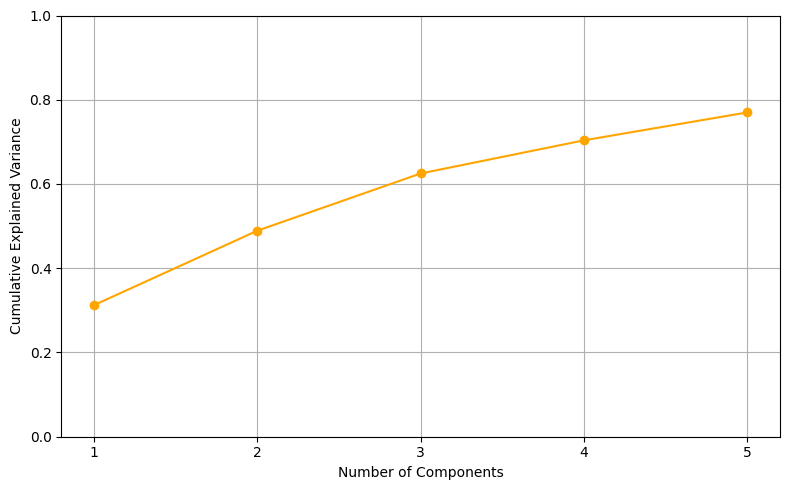

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 2 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

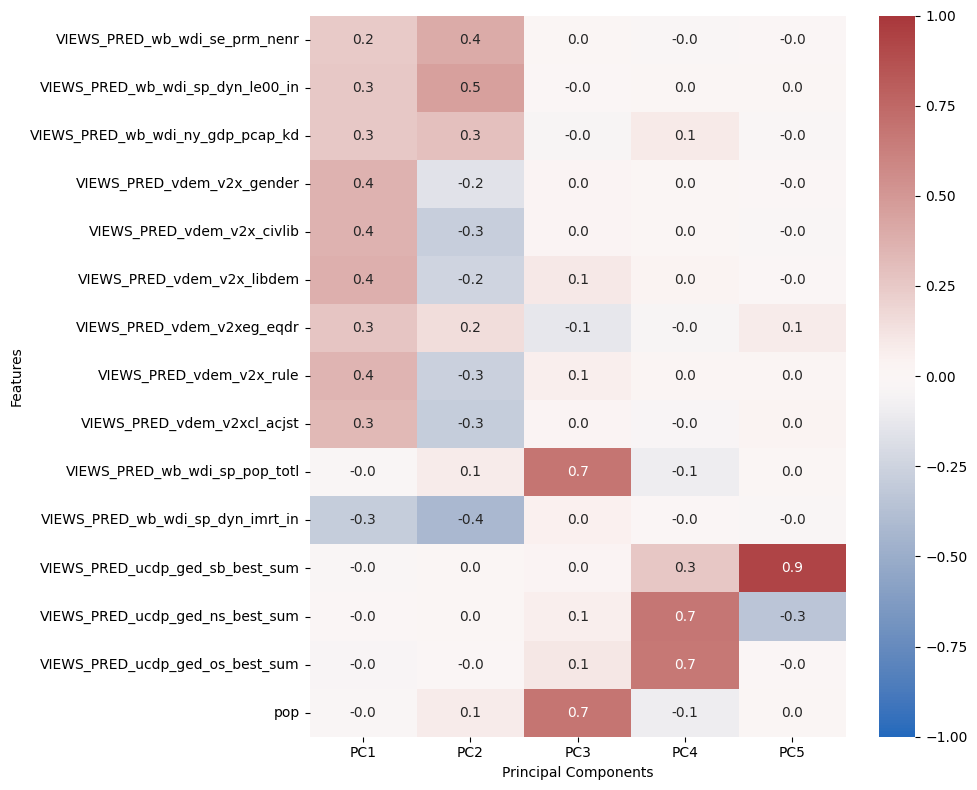

In [25]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [26]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                                   PC1   PC2   PC3   PC4   PC5
VIEWS_PRED_wb_wdi_se_prm_nenr     0.24  0.40  0.01 -0.02 -0.01
VIEWS_PRED_wb_wdi_sp_dyn_le00_in  0.25  0.46 -0.00  0.01  0.00
VIEWS_PRED_wb_wdi_ny_gdp_pcap_kd  0.26  0.29 -0.05  0.09 -0.03
VIEWS_PRED_vdem_v2x_gender        0.37 -0.16  0.02  0.01 -0.00
VIEWS_PRED_vdem_v2x_civlib        0.37 -0.29  0.03  0.01 -0.02
VIEWS_PRED_vdem_v2x_libdem        0.38 -0.24  0.10  0.03 -0.01
VIEWS_PRED_vdem_v2xeg_eqdr        0.27  0.15 -0.13 -0.05  0.08
VIEWS_PRED_vdem_v2x_rule          0.36 -0.27  0.07  0.02  0.02
VIEWS_PRED_vdem_v2xcl_acjst       0.33 -0.29  0.03 -0.04  0.03
VIEWS_PRED_wb_wdi_sp_pop_totl    -0.02  0.08  0.69 -0.09  0.00
VIEWS_PRED_wb_wdi_sp_dyn_imrt_in -0.30 -0.43  0.05 -0.01 -0.02
VIEWS_PRED_ucdp_ged_sb_best_sum  -0.03  0.00  0.03  0.26  0.93
VIEWS_PRED_ucdp_ged_ns_best_sum  -0.01  0.01  0.07  0.67 -0.34
VIEWS_PRED_ucdp_ged_os_best_sum  -0.03 -0.01  0.11  0.67 -0.01
pop                            

## Physical Interpretation

### PC1-Democracy & Development Index, PC1 captures institutional quality, human development, and democratic values — a “Governance & Human Development” dimension.

### PC2-Economic vs Health Development Trade-off, PC2 contrasts economic/health development with democratic institutions, and possibly mortality. Could reflect authoritarian development patterns — places with good health stats but weaker democracy.
